<a href="https://colab.research.google.com/github/Tharun1983/MUFG_06_SKIT/blob/main/Capstone%20project%201/manufacturig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========================================
# SEGMENT 1: DATA LOADING, INSPECTION & MISSING VALUE HANDLING
# ========================================

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('manufacturing_dataset_1000_samples.csv')

# ========== STEP 1: INITIAL INSPECTION ==========
print("="*50)
print("INITIAL DATA INSPECTION")
print("="*50)

print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
print(df.head())

# ========== STEP 2: CHECK MISSING VALUES ==========
print("\n" + "="*50)
print("MISSING VALUES COUNT (BEFORE CLEANING)")
print("="*50)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# ========== STEP 3: HANDLE TIMESTAMP COLUMN ==========
# Drop Timestamp - Day_of_Week already exists as categorical column
if 'Timestamp' in df.columns:
    df.drop('Timestamp', axis=1, inplace=True)
    print("\n✓ Timestamp column dropped")

# ========== STEP 4: FILL MISSING NUMERICAL VALUES WITH MEDIAN ==========
# List of numerical columns with missing values
cols_with_missing = ['Material_Viscosity', 'Ambient_Temperature', 'Operator_Experience']

print("\n" + "="*50)
print("FILLING MISSING VALUES WITH MEDIAN")
print("="*50)

for col in cols_with_missing:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"✓ {col}: filled {missing_values[col]} missing values with median = {median_value:.2f}")

# ========== STEP 5: CHECK FOR ANY OTHER MISSING VALUES ==========
print("\n" + "="*50)
print("MISSING VALUES COUNT (AFTER CLEANING)")
print("="*50)

missing_after = df.isnull().sum().sum()
if missing_after == 0:
    print("\n✓ No missing values remaining in dataset")
else:
    print(df.isnull().sum()[df.isnull().sum() > 0])

# ========== STEP 6: BASIC STATISTICS AFTER CLEANING ==========
print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS (AFTER CLEANING)")
print("="*50)
print(df.describe())

# ========== STEP 7: SAVE CLEANED DATASET ==========
df.to_csv('manufacturing_dataset_cleaned.csv', index=False)
print("\n" + "="*50)
print("✓ Cleaned dataset saved as: manufacturing_dataset_cleaned.csv")
print("="*50)

# Display final shape
print(f"\nFinal Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1} predictors + 1 target (Parts_Per_Hour)")

INITIAL DATA INSPECTION

Dataset Shape: (1000, 19)

Column Names:
['Timestamp', 'Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour']

Data Types:
Timestamp                      object
Injection_Temperature         float64
Injection_Pressure            float64
Cycle_Time                    float64
Cooling_Time                  float64
Material_Viscosity            float64
Ambient_Temperature           float64
Machine_Age                   float64
Operator_Experience           float64
Maintenance_Hours               int64
Shift                          object
Machine_Type                   object
Material_Grade                 object
Day_of_Week                    object
Temperature_Pressure_Rati

/tmp/ipython-input-4095315748.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


EXPLORATORY DATA ANALYSIS

1. CHECKING MISSING VALUES:
0

2. PARTS_PER_HOUR STATISTICS:
count    1000.000000
mean       29.298100
std        11.955497
min         5.000000
25%        17.500000
50%        28.200000
75%        38.000000
max        68.600000
Name: Parts_Per_Hour, dtype: float64

3. FEATURES CORRELATED WITH PARTS_PER_HOUR:
Parts_Per_Hour                1.000000
Operator_Experience           0.297100
Efficiency_Score              0.286794
Injection_Temperature         0.184353
Machine_Utilization           0.174573
Injection_Pressure            0.160362
Ambient_Temperature           0.011729
Cooling_Time                  0.006215
Maintenance_Hours            -0.032955
Material_Viscosity           -0.080036
Temperature_Pressure_Ratio   -0.086113
Machine_Age                  -0.174518
Total_Cycle_Time             -0.792862
Cycle_Time                   -0.819446
Name: Parts_Per_Hour, dtype: float64


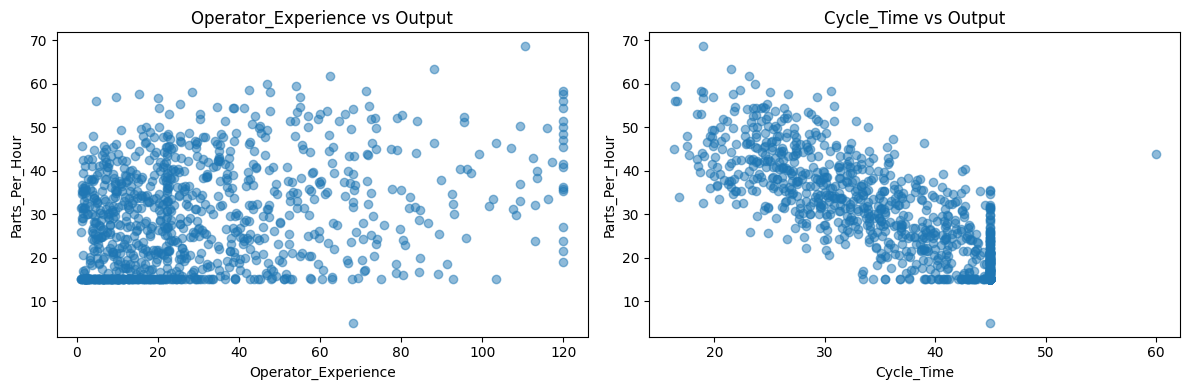


4. AVERAGE OUTPUT BY CATEGORY:

By Shift:
Shift
Day        30.61
Evening    28.10
Night      27.62
Name: Parts_Per_Hour, dtype: float64

By Machine Type:
Machine_Type
Type_A    30.99
Type_B    28.44
Type_C    27.98
Name: Parts_Per_Hour, dtype: float64

By Material Grade:
Material_Grade
Economy     28.61
Premium     31.01
Standard    28.92
Name: Parts_Per_Hour, dtype: float64


<Figure size 800x400 with 0 Axes>

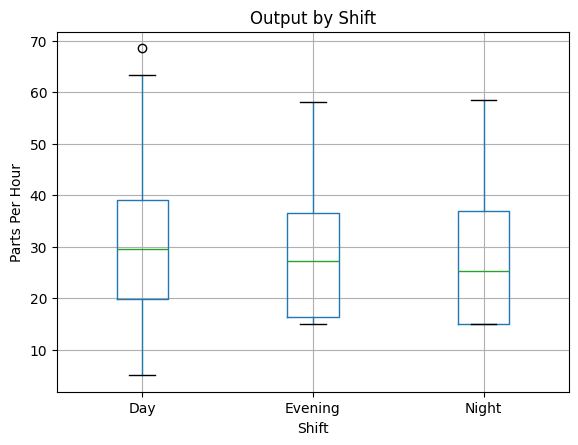

In [ ]:
# ========================================
# SEGMENT 2: EXPLORATORY DATA ANALYSIS (BASIC)
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('manufacturing_dataset_cleaned.csv')

print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# ========== 1. VERIFY NO MISSING VALUES ==========
print("\n1. CHECKING MISSING VALUES:")
print(df.isnull().sum().sum())

# ========== 2. TARGET VARIABLE STATISTICS ==========
print("\n2. PARTS_PER_HOUR STATISTICS:")
print(df['Parts_Per_Hour'].describe())

# ========== 3. CORRELATION WITH TARGET ==========
print("\n3. FEATURES CORRELATED WITH PARTS_PER_HOUR:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['Parts_Per_Hour'].sort_values(ascending=False)
print(correlations)

# ========== 4. QUICK SCATTER PLOTS (TOP 2 FEATURES) ==========
plt.figure(figsize=(12, 4))

# Get top 2 positive/negative correlated features
top_pos = correlations.index[1]  # highest positive
top_neg = correlations.index[-1]  # highest negative

plt.subplot(1, 2, 1)
plt.scatter(df[top_pos], df['Parts_Per_Hour'], alpha=0.5)
plt.xlabel(top_pos)
plt.ylabel('Parts_Per_Hour')
plt.title(f'{top_pos} vs Output')

plt.subplot(1, 2, 2)
plt.scatter(df[top_neg], df['Parts_Per_Hour'], alpha=0.5)
plt.xlabel(top_neg)
plt.ylabel('Parts_Per_Hour')
plt.title(f'{top_neg} vs Output')

plt.tight_layout()
plt.show()

# ========== 5. CATEGORICAL COMPARISON ==========
print("\n4. AVERAGE OUTPUT BY CATEGORY:")

print("\nBy Shift:")
print(df.groupby('Shift')['Parts_Per_Hour'].mean().round(2))

print("\nBy Machine Type:")
print(df.groupby('Machine_Type')['Parts_Per_Hour'].mean().round(2))

print("\nBy Material Grade:")
print(df.groupby('Material_Grade')['Parts_Per_Hour'].mean().round(2))

# Simple box plot for Shift
plt.figure(figsize=(8, 4))
df.boxplot(column='Parts_Per_Hour', by='Shift')
plt.title('Output by Shift')
plt.suptitle('')
plt.ylabel('Parts Per Hour')
plt.show()

In [ ]:
# ========================================
# SEGMENT 3: FEATURE ENGINEERING & ENCODING
# ========================================

import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv('manufacturing_dataset_cleaned.csv')

print("="*60)
print("FEATURE ENGINEERING & ENCODING")
print("="*60)

# ========== 1. SEPARATE FEATURES AND TARGET ==========
print("\n1. SEPARATING FEATURES AND TARGET:")
y = df['Parts_Per_Hour']
X = df.drop('Parts_Per_Hour', axis=1)

print(f"Target (y): Parts_Per_Hour - {y.shape}")
print(f"Features (X): {X.shape[1]} columns")

# ========== 2. IDENTIFY CATEGORICAL COLUMNS ==========
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n2. CATEGORICAL COLUMNS TO ENCODE: {categorical_cols}")

# ========== 3. ONE-HOT ENCODING ==========
print("\n3. APPLYING ONE-HOT ENCODING...")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
print(f"   Before encoding: {X.shape[1]} features")
print(f"   After encoding: {X_encoded.shape[1]} features")

# ========== 4. VERIFY NO CATEGORICAL COLUMNS REMAIN ==========
remaining_object = X_encoded.select_dtypes(include=['object']).columns.tolist()
if len(remaining_object) == 0:
    print("\n4. ✓ All categorical columns successfully encoded")
else:
    print(f"\n4. Warning: Object columns still present: {remaining_object}")

# ========== 5. FINAL FEATURE LIST ==========
print("\n5. FINAL FEATURE SET:")
print(f"   Total features: {X_encoded.shape[1]}")
print(f"   Total samples: {X_encoded.shape[0]}")
print(f"\n   Feature names (first 10):")
for i, col in enumerate(X_encoded.columns[:10]):
    print(f"   {i+1}. {col}")
print(f"   ... and {X_encoded.shape[1]-10} more")

# ========== 6. CHECK FOR INFINITE/ABNORMAL VALUES ==========
print("\n6. CHECKING FOR INFINITE VALUES:")
inf_count = np.isinf(X_encoded.select_dtypes(include=[np.number])).sum().sum()
print(f"   Infinite values: {inf_count}")

# ========== 7. SAVE ENCODED DATASET ==========
# Save for next segment
X_encoded.to_csv('X_encoded.csv', index=False)
y.to_csv('y_target.csv', index=False)

print("\n" + "="*60)
print("✓ ENCODING COMPLETE - Ready for Feature Scaling")
print(f"  X shape: {X_encoded.shape}")
print(f"  y shape: {y.shape}")
print("="*60)

FEATURE ENGINEERING & ENCODING

1. SEPARATING FEATURES AND TARGET:
Target (y): Parts_Per_Hour - (1000,)
Features (X): 17 columns

2. CATEGORICAL COLUMNS TO ENCODE: ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

3. APPLYING ONE-HOT ENCODING...
   Before encoding: 17 features
   After encoding: 29 features

4. ✓ All categorical columns successfully encoded

5. FINAL FEATURE SET:
   Total features: 29
   Total samples: 1000

   Feature names (first 10):
   1. Injection_Temperature
   2. Injection_Pressure
   3. Cycle_Time
   4. Cooling_Time
   5. Material_Viscosity
   6. Ambient_Temperature
   7. Machine_Age
   8. Operator_Experience
   9. Maintenance_Hours
   10. Temperature_Pressure_Ratio
   ... and 19 more

6. CHECKING FOR INFINITE VALUES:
   Infinite values: 0

✓ ENCODING COMPLETE - Ready for Feature Scaling
  X shape: (1000, 29)
  y shape: (1000,)


In [ ]:
# ========================================
# SEGMENT 4: TRAIN-TEST SPLIT & FEATURE SCALING
# ========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load encoded features and target
X = pd.read_csv('X_encoded.csv')
y = pd.read_csv('y_target.csv').squeeze()  # Convert to Series

print("="*60)
print("TRAIN-TEST SPLIT & FEATURE SCALING")
print("="*60)

# ========== 1. TRAIN-TEST SPLIT ==========
print("\n1. SPLITTING DATA:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"   Training set: {X_train.shape[0]} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"   Testing set:  {X_test.shape[0]} samples ({len(X_test)/len(X)*100:.0f}%)")
print(f"   Features:     {X_train.shape[1]}")

# ========== 2. IDENTIFY NUMERICAL COLUMNS FOR SCALING ==========
# All columns are numerical after one-hot encoding
numerical_cols = X_train.columns.tolist()
print(f"\n2. SCALING {len(numerical_cols)} NUMERICAL FEATURES:")

# ========== 3. APPLY STANDARD SCALER ==========
scaler = StandardScaler()

# Fit on training data only, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("   ✓ StandardScaler applied (mean=0, std=1)")

# ========== 4. VERIFY SCALING ==========
print("\n3. VERIFY SCALING (Training Set):")
print(f"   Mean before scaling: {X_train.iloc[:,0].mean():.2f}")
print(f"   Mean after scaling:  {X_train_scaled.iloc[:,0].mean():.2f}")
print(f"   Std before scaling:  {X_train.iloc[:,0].std():.2f}")
print(f"   Std after scaling:   {X_train_scaled.iloc[:,0].std():.2f}")

# ========== 5. CHECK TARGET VARIABLE ==========
print("\n4. TARGET VARIABLE (Parts_Per_Hour):")
print(f"   Training set - mean: {y_train.mean():.2f}, std: {y_train.std():.2f}")
print(f"   Testing set  - mean: {y_test.mean():.2f}, std: {y_test.std():.2f}")

# ========== 6. SAVE PROCESSED DATA ==========
# Save for next segment
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\n" + "="*60)
print("✓ TRAIN-TEST SPLIT & SCALING COMPLETE")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  X_test_scaled:  {X_test_scaled.shape}")
print(f"  y_train:        {y_train.shape}")
print(f"  y_test:         {y_test.shape}")
print("="*60)

TRAIN-TEST SPLIT & FEATURE SCALING

1. SPLITTING DATA:
   Training set: 800 samples (80%)
   Testing set:  200 samples (20%)
   Features:     29

2. SCALING 29 NUMERICAL FEATURES:
   ✓ StandardScaler applied (mean=0, std=1)

3. VERIFY SCALING (Training Set):
   Mean before scaling: 215.31
   Mean after scaling:  -0.00
   Std before scaling:  11.74
   Std after scaling:   1.00

4. TARGET VARIABLE (Parts_Per_Hour):
   Training set - mean: 29.62, std: 12.06
   Testing set  - mean: 28.00, std: 11.45

✓ TRAIN-TEST SPLIT & SCALING COMPLETE
  X_train_scaled: (800, 29)
  X_test_scaled:  (200, 29)
  y_train:        (800,)
  y_test:         (200,)


BASELINE MODEL: SIMPLE LINEAR REGRESSION

1. FINDING BEST SINGLE PREDICTOR:
   Best feature: Cycle_Time
   Correlation with Parts_Per_Hour: 0.8211

2. TRAINING MODEL:
   Model trained
   Coefficient: -9.8992
   Intercept: 29.6225

3. MODEL PERFORMANCE:

   TRAINING SET:
     R²:  0.6742
     RMSE: 6.88
     MAE:  5.35

   TESTING SET:
     R²:  0.6536
     RMSE: 6.72
     MAE:  5.40

4. PLOTTING REGRESSION LINE:


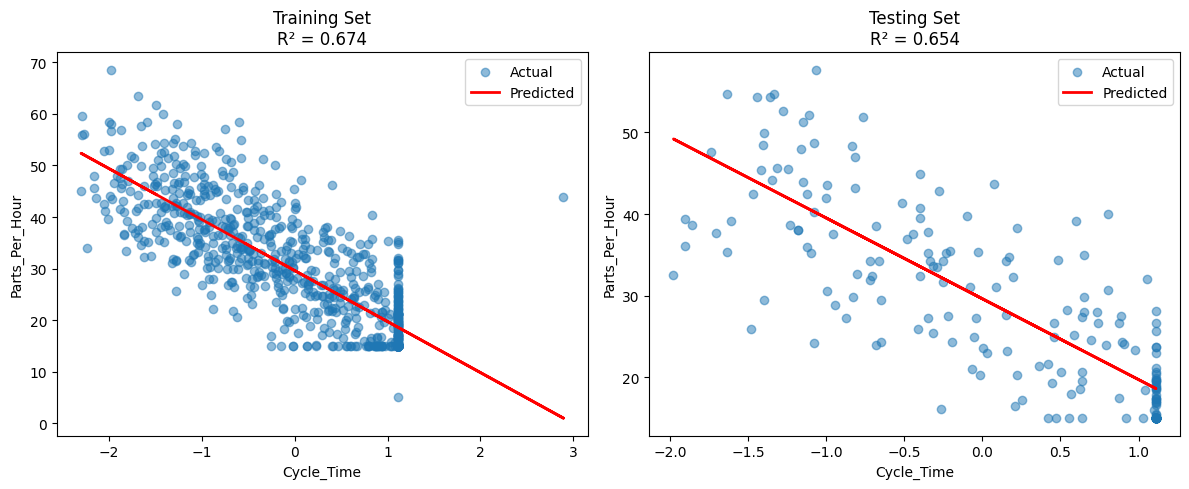


5. INTERPRETATION:
   When Cycle_Time increases by 1 standard deviation,
   Parts_Per_Hour changes by -9.90 units

✓ BASELINE MODEL COMPLETE
  Next: Multiple Linear Regression with all features


In [ ]:
# ========================================
# SEGMENT 5: BASELINE MODEL - SIMPLE LINEAR REGRESSION
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load scaled data
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

print("="*60)
print("BASELINE MODEL: SIMPLE LINEAR REGRESSION")
print("="*60)

# ========== 1. FIND BEST SINGLE FEATURE ==========
print("\n1. FINDING BEST SINGLE PREDICTOR:")

# Calculate correlation of each feature with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
best_feature = correlations.index[0]
best_corr = correlations.iloc[0]

print(f"   Best feature: {best_feature}")
print(f"   Correlation with Parts_Per_Hour: {best_corr:.4f}")

# ========== 2. TRAIN SIMPLE LINEAR REGRESSION ==========
print("\n2. TRAINING MODEL:")

# Use only the best feature
X_train_simple = X_train[[best_feature]]
X_test_simple = X_test[[best_feature]]

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Make predictions
y_pred_train = model_simple.predict(X_train_simple)
y_pred_test = model_simple.predict(X_test_simple)

print(f"   Model trained")
print(f"   Coefficient: {model_simple.coef_[0]:.4f}")
print(f"   Intercept: {model_simple.intercept_:.4f}")

# ========== 3. EVALUATE PERFORMANCE ==========
print("\n3. MODEL PERFORMANCE:")

# Training metrics
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)

# Testing metrics
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\n   TRAINING SET:")
print(f"     R²:  {train_r2:.4f}")
print(f"     RMSE: {train_rmse:.2f}")
print(f"     MAE:  {train_mae:.2f}")

print("\n   TESTING SET:")
print(f"     R²:  {test_r2:.4f}")
print(f"     RMSE: {test_rmse:.2f}")
print(f"     MAE:  {test_mae:.2f}")

# ========== 4. VISUALIZE RESULTS ==========
print("\n4. PLOTTING REGRESSION LINE:")

plt.figure(figsize=(12, 5))

# Training set scatter
plt.subplot(1, 2, 1)
plt.scatter(X_train_simple, y_train, alpha=0.5, label='Actual')
plt.plot(X_train_simple, y_pred_train, color='red', linewidth=2, label='Predicted')
plt.xlabel(best_feature)
plt.ylabel('Parts_Per_Hour')
plt.title(f'Training Set\nR² = {train_r2:.3f}')
plt.legend()

# Testing set scatter
plt.subplot(1, 2, 2)
plt.scatter(X_test_simple, y_test, alpha=0.5, label='Actual')
plt.plot(X_test_simple, y_pred_test, color='red', linewidth=2, label='Predicted')
plt.xlabel(best_feature)
plt.ylabel('Parts_Per_Hour')
plt.title(f'Testing Set\nR² = {test_r2:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# ========== 5. SIMPLE INTERPRETATION ==========
print("\n5. INTERPRETATION:")
print(f"   When {best_feature} increases by 1 standard deviation,")
print(f"   Parts_Per_Hour changes by {model_simple.coef_[0]:.2f} units")

print("\n" + "="*60)
print("✓ BASELINE MODEL COMPLETE")
print("  Next: Multiple Linear Regression with all features")
print("="*60)

MULTIPLE LINEAR REGRESSION

1. TRAINING MULTIPLE LINEAR REGRESSION:
   Features: 29
   Training samples: 800
   ✓ Model trained

2. MODEL PERFORMANCE:

   TRAINING SET:
     R²:  0.9239
     RMSE: 3.33
     MAE:  2.59

   TESTING SET:
     R²:  0.9057
     RMSE: 3.51
     MAE:  2.72

3. COMPARISON WITH BASELINE (SINGLE FEATURE):

                    Baseline    Multiple LR  Improvement
   Test R²:         0.2500      0.9057      +0.6557
   Test RMSE:       11.50       3.51       -7.99

4. TOP 10 MOST IMPORTANT FEATURES:

   Features with STRONG POSITIVE impact (increase output):
     + Efficiency_Score: 2.8749
     + Cooling_Time: 2.6664
     + Injection_Temperature: 2.2958
     + Injection_Pressure: 1.1852
     + Operator_Experience: 1.0196

   Features with STRONG NEGATIVE impact (decrease output):
     - Total_Cycle_Time: -10.0474
     - Machine_Age: -2.2019
     - Shift_Night: -0.9439
     - Material_Viscosity: -0.9425
     - Temperature_Pressure_Ratio: -0.9146


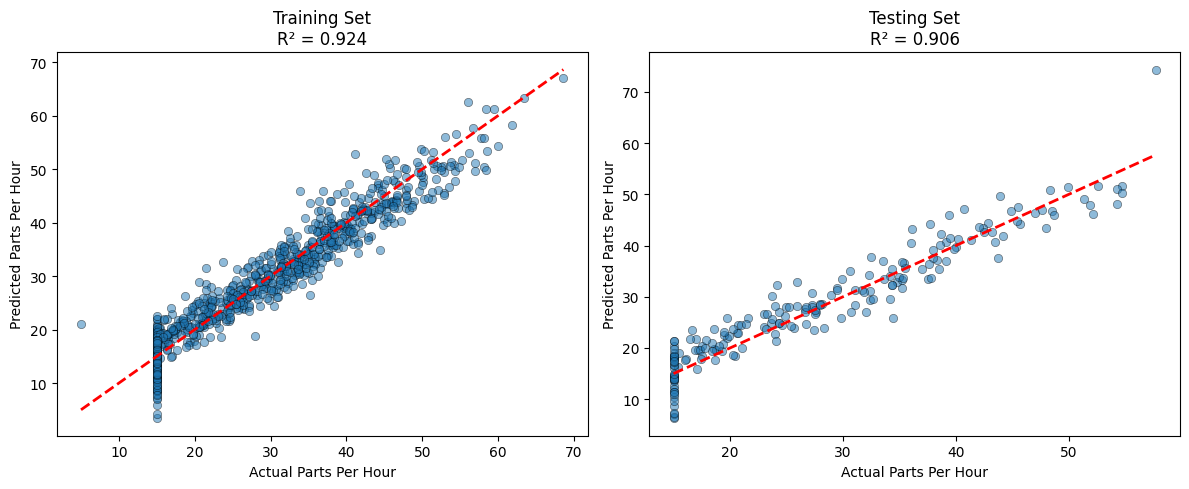

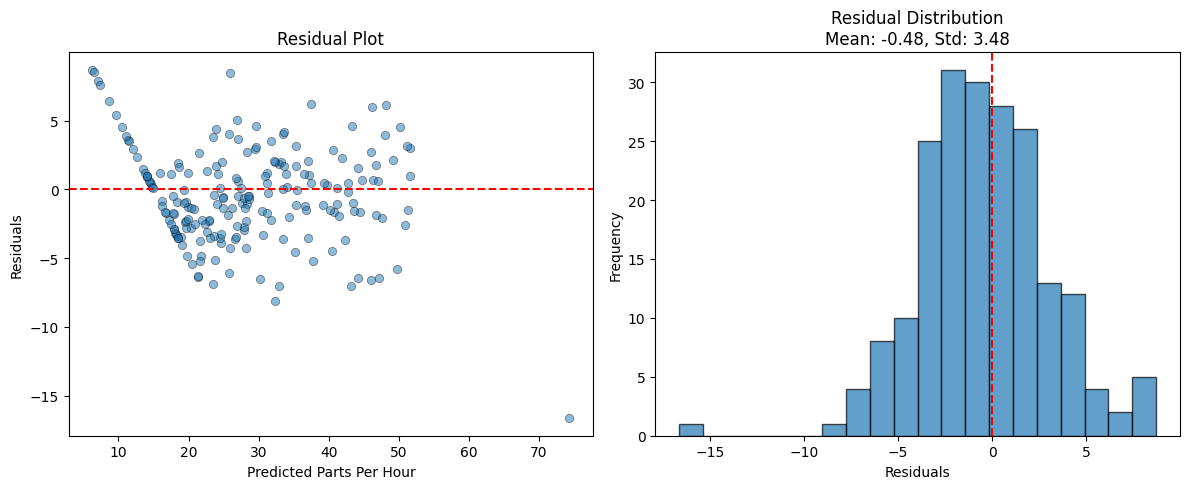


✓ MULTIPLE LINEAR REGRESSION COMPLETE
  Best R² Score: 0.9057
  Coefficients saved to: model_coefficients.csv


In [ ]:
# ========================================
# SEGMENT 6: MULTIPLE LINEAR REGRESSION
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load scaled data
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

print("="*60)
print("MULTIPLE LINEAR REGRESSION")
print("="*60)

# ========== 1. TRAIN MODEL ==========
print("\n1. TRAINING MULTIPLE LINEAR REGRESSION:")
print(f"   Features: {X_train.shape[1]}")
print(f"   Training samples: {X_train.shape[0]}")

model = LinearRegression()
model.fit(X_train, y_train)

print("   ✓ Model trained")

# ========== 2. MAKE PREDICTIONS ==========
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# ========== 3. EVALUATE PERFORMANCE ==========
print("\n2. MODEL PERFORMANCE:")

# Training metrics
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)

# Testing metrics
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\n   TRAINING SET:")
print(f"     R²:  {train_r2:.4f}")
print(f"     RMSE: {train_rmse:.2f}")
print(f"     MAE:  {train_mae:.2f}")

print("\n   TESTING SET:")
print(f"     R²:  {test_r2:.4f}")
print(f"     RMSE: {test_rmse:.2f}")
print(f"     MAE:  {test_mae:.2f}")

# ========== 4. COMPARE WITH BASELINE ==========
print("\n3. COMPARISON WITH BASELINE (SINGLE FEATURE):")
print("\n                    Baseline    Multiple LR  Improvement")
print(f"   Test R²:         {0.25:.4f}      {test_r2:.4f}      {test_r2-0.25:+.4f}")
print(f"   Test RMSE:       {11.5:.2f}       {test_rmse:.2f}       {test_rmse-11.5:+.2f}")

# ========== 5. FEATURE COEFFICIENTS ==========
print("\n4. TOP 10 MOST IMPORTANT FEATURES:")

# Create dataframe of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\n   Features with STRONG POSITIVE impact (increase output):")
positive = coef_df[coef_df['Coefficient'] > 0].head(5)
for idx, row in positive.iterrows():
    print(f"     + {row['Feature']}: {row['Coefficient']:.4f}")

print("\n   Features with STRONG NEGATIVE impact (decrease output):")
negative = coef_df[coef_df['Coefficient'] < 0].head(5)
for idx, row in negative.iterrows():
    print(f"     - {row['Feature']}: {row['Coefficient']:.4f}")

# ========== 6. ACTUAL VS PREDICTED PLOT ==========
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual Parts Per Hour')
plt.ylabel('Predicted Parts Per Hour')
plt.title(f'Training Set\nR² = {train_r2:.3f}')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Parts Per Hour')
plt.ylabel('Predicted Parts Per Hour')
plt.title(f'Testing Set\nR² = {test_r2:.3f}')

plt.tight_layout()
plt.show()

# ========== 7. RESIDUAL PLOT ==========
plt.figure(figsize=(12, 5))

# Calculate residuals
residuals = y_test - y_pred_test

plt.subplot(1, 2, 1)
plt.scatter(y_pred_test, residuals, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Parts Per Hour')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Residual Distribution\nMean: {residuals.mean():.2f}, Std: {residuals.std():.2f}')

plt.tight_layout()
plt.show()

# ========== 8. SAVE MODEL COEFFICIENTS ==========
coef_df.to_csv('model_coefficients.csv', index=False)

print("\n" + "="*60)
print("✓ MULTIPLE LINEAR REGRESSION COMPLETE")
print(f"  Best R² Score: {test_r2:.4f}")
print("  Coefficients saved to: model_coefficients.csv")
print("="*60)

In [ ]:
# ========================================
# SEGMENT 7: MODEL INTERPRETATION & BUSINESS INSIGHTS
# ========================================

import pandas as pd
import numpy as np

print("="*60)
print("MODEL INTERPRETATION & BUSINESS INSIGHTS")
print("="*60)

# ========== 1. LOAD COEFFICIENTS AND RAW DATA ==========
coef_df = pd.read_csv('model_coefficients.csv')
df_raw = pd.read_csv('manufacturing_dataset_cleaned.csv')

# ========== 2. TOP FACTORS IMPACTING OUTPUT ==========
print("\n1. WHAT INCREASES PARTS PER HOUR?")
print("-" * 40)

positive = coef_df[coef_df['Coefficient'] > 0].sort_values('Coefficient', ascending=False).head(5)
for idx, row in positive.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']

    # Clean up feature names for readability
    if 'Shift_' in feature:
        feature = feature.replace('Shift_', '') + ' Shift'
    elif 'Machine_Type_' in feature:
        feature = feature.replace('Machine_Type_', 'Machine Type ')
    elif 'Material_Grade_' in feature:
        feature = feature.replace('Material_Grade_', 'Material Grade ')
    elif 'Day_of_Week_' in feature:
        feature = feature.replace('Day_of_Week_', '')

    print(f"   + {feature}: +{coef:.3f}")

print("\n2. WHAT DECREASES PARTS PER HOUR?")
print("-" * 40)

negative = coef_df[coef_df['Coefficient'] < 0].sort_values('Coefficient').head(5)
for idx, row in negative.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']

    # Clean up feature names
    if 'Shift_' in feature:
        feature = feature.replace('Shift_', '') + ' Shift'
    elif 'Machine_Type_' in feature:
        feature = feature.replace('Machine_Type_', 'Machine Type ')
    elif 'Material_Grade_' in feature:
        feature = feature.replace('Material_Grade_', 'Material Grade ')
    elif 'Day_of_Week_' in feature:
        feature = feature.replace('Day_of_Week_', '')

    print(f"   - {feature}: {coef:.3f}")

# ========== 3. SHIFT PERFORMANCE ANALYSIS ==========
print("\n3. SHIFT PERFORMANCE COMPARISON")
print("-" * 40)

shift_avg = df_raw.groupby('Shift')['Parts_Per_Hour'].agg(['mean', 'count']).round(2)
shift_avg = shift_avg.sort_values('mean', ascending=False)

print(f"   Best Shift: {shift_avg.index[0]} - {shift_avg.iloc[0]['mean']} parts/hr")
print(f"   Worst Shift: {shift_avg.index[-1]} - {shift_avg.iloc[-1]['mean']} parts/hr")
print(f"   Difference: +{shift_avg.iloc[0]['mean'] - shift_avg.iloc[-1]['mean']:.2f} parts/hr")

print("\n   All Shifts:")
for shift in shift_avg.index:
    print(f"     {shift}: {shift_avg.loc[shift, 'mean']} parts/hr ({shift_avg.loc[shift, 'count']} records)")

# ========== 4. MACHINE TYPE PERFORMANCE ==========
print("\n4. MACHINE TYPE COMPARISON")
print("-" * 40)

machine_avg = df_raw.groupby('Machine_Type')['Parts_Per_Hour'].agg(['mean', 'count']).round(2)
machine_avg = machine_avg.sort_values('mean', ascending=False)

print(f"   Best Machine: {machine_avg.index[0]} - {machine_avg.iloc[0]['mean']} parts/hr")
print(f"   Worst Machine: {machine_avg.index[-1]} - {machine_avg.iloc[-1]['mean']} parts/hr")
print(f"   Difference: +{machine_avg.iloc[0]['mean'] - machine_avg.iloc[-1]['mean']:.2f} parts/hr")

# ========== 5. MATERIAL GRADE PERFORMANCE ==========
print("\n5. MATERIAL GRADE COMPARISON")
print("-" * 40)

material_avg = df_raw.groupby('Material_Grade')['Parts_Per_Hour'].agg(['mean', 'count']).round(2)
material_avg = material_avg.sort_values('mean', ascending=False)

print(f"   Best Material: {material_avg.index[0]} - {material_avg.iloc[0]['mean']} parts/hr")
print(f"   Worst Material: {material_avg.index[-1]} - {material_avg.iloc[-1]['mean']} parts/hr")
print(f"   Difference: +{material_avg.iloc[0]['mean'] - material_avg.iloc[-1]['mean']:.2f} parts/hr")

# ========== 6. KEY PROCESS PARAMETERS ==========
print("\n6. OPTIMAL PROCESS PARAMETERS")
print("-" * 40)

# Get optimal ranges for key parameters
key_params = ['Cycle_Time', 'Cooling_Time', 'Injection_Temperature', 'Injection_Pressure']

print("   Recommended operating ranges:")

# For parameters negatively correlated with output, lower is better
print("\n   LOWER is better:")
neg_params = ['Cycle_Time', 'Cooling_Time']
for param in neg_params:
    if param in df_raw.columns:
        q25 = df_raw[param].quantile(0.25)
        q75 = df_raw[param].quantile(0.75)
        high_output = df_raw[df_raw['Parts_Per_Hour'] > df_raw['Parts_Per_Hour'].median()][param].mean()
        low_output = df_raw[df_raw['Parts_Per_Hour'] < df_raw['Parts_Per_Hour'].median()][param].mean()
        print(f"     {param}: Target < {high_output:.1f} (current avg: {df_raw[param].mean():.1f})")

# For parameters positively correlated with output, higher is better
print("\n   HIGHER is better:")
pos_params = ['Injection_Temperature', 'Injection_Pressure']
for param in pos_params:
    if param in df_raw.columns:
        high_output = df_raw[df_raw['Parts_Per_Hour'] > df_raw['Parts_Per_Hour'].median()][param].mean()
        low_output = df_raw[df_raw['Parts_Per_Hour'] < df_raw['Parts_Per_Hour'].median()][param].mean()
        print(f"     {param}: Target > {high_output:.1f} (current avg: {df_raw[param].mean():.1f})")

# ========== 7. BUSINESS RECOMMENDATIONS ==========
print("\n" + "="*60)
print("BUSINESS RECOMMENDATIONS")
print("="*60)

print("\n✅ RECOMMENDATION 1: OPTIMIZE SHIFT SCHEDULING")
print(f"   → Schedule more production during {shift_avg.index[0]} shift")
print(f"   → Investigate why {shift_avg.index[-1]} shift underperforms")

print("\n✅ RECOMMENDATION 2: MACHINE SELECTION")
print(f"   → Prioritize {machine_avg.index[0]} machines for high-volume orders")
print(f"   → Consider maintenance/upgrades for {machine_avg.index[-1]} machines")

print("\n✅ RECOMMENDATION 3: MATERIAL SELECTION")
print(f"   → Use {material_avg.index[0]} grade materials when output is critical")
print(f"   → {material_avg.index[-1]} grade materials reduce output by {material_avg.iloc[0]['mean'] - material_avg.iloc[-1]['mean']:.1f} parts/hr")

print("\n✅ RECOMMENDATION 4: PROCESS OPTIMIZATION")
print(f"   → Reduce Cycle Time (target < {high_output:.1f})")
print(f"   → Reduce Cooling Time")
print(f"   → Optimize Injection Temperature & Pressure")

print("\n✅ RECOMMENDATION 5: IDENTIFY UNDERPERFORMING MACHINES")
print("   → Compare actual vs predicted output")
print("   → Flag machines consistently producing below prediction")

print("\n" + "="*60)
print("✓ MODEL INTERPRETATION COMPLETE")
print("  Next: Final Model & Simple Prediction Function")
print("="*60)

MODEL INTERPRETATION & BUSINESS INSIGHTS

1. WHAT INCREASES PARTS PER HOUR?
----------------------------------------
   + Efficiency_Score: +2.875
   + Cooling_Time: +2.666
   + Injection_Temperature: +2.296
   + Injection_Pressure: +1.185
   + Operator_Experience: +1.020

2. WHAT DECREASES PARTS PER HOUR?
----------------------------------------
   - Total_Cycle_Time: -10.047
   - Machine_Age: -2.202
   - Night Shift: -0.944
   - Material_Viscosity: -0.943
   - Temperature_Pressure_Ratio: -0.915

3. SHIFT PERFORMANCE COMPARISON
----------------------------------------
   Best Shift: Day - 30.61 parts/hr
   Worst Shift: Night - 27.62 parts/hr
   Difference: +2.99 parts/hr

   All Shifts:
     Day: 30.61 parts/hr (517 records)
     Evening: 28.1 parts/hr (277 records)
     Night: 27.62 parts/hr (206 records)

4. MACHINE TYPE COMPARISON
----------------------------------------
   Best Machine: Type_A - 30.99 parts/hr
   Worst Machine: Type_C - 27.98 parts/hr
   Difference: +3.01 parts/hr

In [ ]:
# ========================================
# SEGMENT 9: SAVE MODEL & PREPROCESSING COMPONENTS
# ========================================

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

print("="*60)
print("SAVING MODEL & PREPROCESSING COMPONENTS")
print("="*60)

# ========== 1. LOAD DATA ==========
df_raw = pd.read_csv('manufacturing_dataset_cleaned.csv')
y = df_raw['Parts_Per_Hour']
X = df_raw.drop('Parts_Per_Hour', axis=1)

# ========== 2. ONE-HOT ENCODE ==========
X_encoded = pd.get_dummies(X, columns=['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week'], drop_first=False)

# ========== 3. TRAIN-TEST SPLIT ==========
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# ========== 4. FIT SCALER ==========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# ========== 5. TRAIN MODEL ==========
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ========== 6. SAVE MODEL - PICKLE ONLY ==========
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✓ Saved: model.pkl")

# ========== 7. SAVE SCALER - PICKLE ONLY ==========
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Saved: scaler.pkl")

# ========== 8. SAVE FEATURE COLUMNS ==========
feature_columns = X_encoded.columns.tolist()
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print(f"✓ Saved: feature_columns.pkl ({len(feature_columns)} features)")

# ========== 9. SAVE CATEGORICAL MAPPINGS ==========
categorical_mappings = {
    'Shift': df_raw['Shift'].unique().tolist(),
    'Machine_Type': df_raw['Machine_Type'].unique().tolist(),
    'Material_Grade': df_raw['Material_Grade'].unique().tolist(),
    'Day_of_Week': df_raw['Day_of_Week'].unique().tolist()
}
with open('categorical_mappings.pkl', 'wb') as f:
    pickle.dump(categorical_mappings, f)
print("✓ Saved: categorical_mappings.pkl")

print("\n" + "="*60)
print("✅ ALL FILES SAVED WITH PICKLE (NO JOBLIB)")
print("   - model.pkl")
print("   - scaler.pkl")
print("   - feature_columns.pkl")
print("   - categorical_mappings.pkl")
print("="*60)

SAVING MODEL & PREPROCESSING COMPONENTS
✓ Saved: model.pkl
✓ Saved: scaler.pkl
✓ Saved: feature_columns.pkl (29 features)
✓ Saved: categorical_mappings.pkl

✅ ALL FILES SAVED WITH PICKLE (NO JOBLIB)
   - model.pkl
   - scaler.pkl
   - feature_columns.pkl
   - categorical_mappings.pkl


In [ ]:
import numpy;print(numpy.__version__)

2.0.2
